11493376/11490434 [==============================] - 1s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


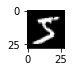

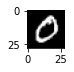

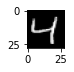

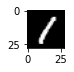

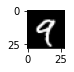

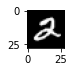

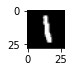

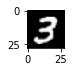

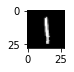

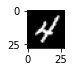

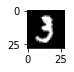

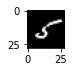

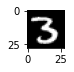

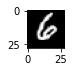

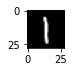

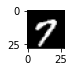

KeyboardInterrupt: 

In [1]:
from tensorflow.keras.datasets.mnist import load_data
# MNIST 데이터 적재
(trainX, trainY), (testX, testY) = load_data()
# 적재된 MNIST 이미지와 라벨 데이터 요약
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))
import matplotlib.pyplot as plt
# 처음 25개 이미지 데이터 표시
for i in range(25):
    # 5 x 5의 서브플롯 정의
    plt.subplot(5, 5, i+1)
    # 이미지 데이터(픽셀)를 표시
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
    # 그림을 화면에 보여줌
    plt.show()


In [3]:

# 픽셀 데이터 변환
# 변환 전 첫번째 이미지 10 행 출력
print(trainX[0][10])
# 0-255의 픽셀 값을 0-1 사이 값으로 변환
trainX = trainX.astype('float32') # 실수형 변환
testX = testX.astype('float32')
trainX = trainX / 255
testX = testX / 255
# 변환 후 첫번째 이미지 10 행 출력
print(trainX[0][10])
from tensorflow.keras.utils import to_categorical
# 원핫 인코딩(one-hot encoding)
trainY = to_categorical(trainY, 10)
testY = to_categorical(testY, 10)
print(trainY)
# 학습 구조 계층 구조 모델링
from keras.models import Sequential
from keras.layers import Dense,Flatten
model = Sequential([ Flatten(input_shape=(28, 28)),
Dense(128, activation='relu'),
Dense(10, activation='softmax') ])

# 모델 구조 요약
model.summary()

[  0   0   0   0   0   0   0   0   0  14   1 154 253  90   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.05490196 0.00392157 0.6039216
 0.99215686 0.3529412  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)        

In [4]:
# 학습 모델 설정
from tensorflow.keras.optimizers import SGD
# 경사하강법 최적화, 크로스 엔트로피 손실 함수
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
# 128개의 배치 크기, 200번 에포크로 학습 수행
model.fit(trainX, trainY, batch_size=128, epochs=200, verbose=1)
# 학습 모델평가
test_loss, test_acc = model.evaluate(testX, testY)
print('Test accuracy: ', test_acc)
import numpy as np
# 모델 예측
image0 = trainX[0] # 0번째 이미지
yhat = model.predict(np.array([image0]))
print(image0.shape, np.array([image0]).shape)
print('Predicted: class=%d' % np.argmax(yhat))
image5 = trainX[5] # 5번째 이미지
yhat = model.predict(np.array([image5]))
print('Predicted: class=%d' % np.argmax(yhat))

Epoch 1/200
469/469 [==============================] - 4s 6ms/step - loss: 1.2436 - accuracy: 0.6992
Epoch 2/200
469/469 [==============================] - 3s 6ms/step - loss: 0.5661 - accuracy: 0.8609
Epoch 3/200
469/469 [==============================] - 3s 6ms/step - loss: 0.4435 - accuracy: 0.8833
Epoch 4/200
469/469 [==============================] - 3s 6ms/step - loss: 0.3913 - accuracy: 0.8936
Epoch 5/200
469/469 [==============================] - 3s 6ms/step - loss: 0.3602 - accuracy: 0.9005: 0s
Epoch 6/200
469/469 [==============================] - 3s 6ms/step - loss: 0.3386 - accuracy: 0.9059
Epoch 7/200
469/469 [==============================] - 3s 6ms/step - loss: 0.3217 - accuracy: 0.9097
Epoch 8/200
469/469 [==============================] - 3s 6ms/step - loss: 0.3081 - accuracy: 0.9128: 0s - loss: 0.307
Epoch 9/200
469/469 [==============================] - 3s 6ms/step - loss: 0.2966 - accuracy: 0.9161
Epoch 10/200
469/469 [==============================] - 3s 6ms/step -

469/469 [==============================] - 4s 9ms/step - loss: 0.0584 - accuracy: 0.9848: 0s - loss: 0.0583 - accuracy: 0.
Epoch 157/200
469/469 [==============================] - 3s 7ms/step - loss: 0.0580 - accuracy: 0.9850
Epoch 158/200
469/469 [==============================] - 3s 7ms/step - loss: 0.0577 - accuracy: 0.9850
Epoch 159/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0574 - accuracy: 0.9849: 0s - loss: 0.0573 - accuracy: 0.98
Epoch 160/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0570 - accuracy: 0.9852
Epoch 161/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0567 - accuracy: 0.9853: 0s - loss: 0.0565 - accuracy
Epoch 162/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0564 - accuracy: 0.9852
Epoch 163/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0561 - accuracy: 0.9854
Epoch 164/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0557 - accu